In [1]:
import h5py
import os
import numpy as np
# import matplotlib as mpl
# mpl.use('Qt5Agg')
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.animation as animation
from tqdm.notebook import tqdm
import pandas as pd

In [12]:
with h5py.File(os.path.join("..", "Preiswerk", "datasets", "A", "1", "us_data.h5"), "r") as f:
    preiswerk_data = np.array(f['us_data']).squeeze()

my_data = pd.read_pickle(os.path.join("C:", os.sep, "dev", "depth-testing", "techmed_test_2703", "Test1", "us", "test1.pickle"))
my_data2 = pd.read_pickle(os.path.join("C:", os.sep, "dev", "depth-testing", "techmed_test_2703", "Test2", "us", "test2.pickle"))
my_data3 = pd.read_pickle(os.path.join("C:", os.sep, "dev", "depth-testing", "techmed_test_2703", "Test3", "us", "test2.pickle"))
my_data4 = pd.read_pickle(os.path.join("C:", os.sep, "dev", "depth-testing", "techmed_test_2703", "Test4", "us", "test2.pickle"))

In [10]:
np.array(my_data[0])

array([[-0.00390625,  0.0078125 ,  0.03125   , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.015625  ,  0.03125   , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01953125,  0.04296875,  0.03515625, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.01171875, -0.00390625, -0.0078125 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01171875,  0.02734375,  0.02734375, ...,  0.        ,
         0.        ,  0.        ],
       [-0.015625  , -0.00390625,  0.015625  , ...,  0.        ,
         0.        ,  0.        ]])

In [3]:
start = datetime.fromtimestamp(my_data[1][0])
finish = datetime.fromtimestamp(my_data[1][-1])

fps = len(my_data[1]) / (finish - start).seconds
fps

10.992982456140352

In [4]:
interval = 1000/fps
interval

90.9671241621449

In [5]:
frames = []
fig = plt.figure()
for i in tqdm(range(2000)):
    frames.append(plt.plot(my_data[0][i], color="blue"))
    
ani = animation.ArtistAnimation(fig, frames, interval=82)
plt.show()

  0%|          | 0/2000 [00:00<?, ?it/s]

In [8]:
with open("../Veenstra/07-08-2019_15_17_02_5/Wave.opt", "r") as f:
    f.readline()
    first = f.readline()
    frames = []
    fig = plt.figure()
    for i, line in enumerate(f):
        row = []
        if i%2 !=0 and i < 1000:
            for y in line.replace("\n", "").split(", "):
                row.append(float(y))
                
            # print(row)
            # plt.yticks(np.arange(0, 200, step=10))
            frames.append(plt.plot(row, color="blue"))
        
    ani = animation.ArtistAnimation(fig, frames, interval=10)
    plt.show()

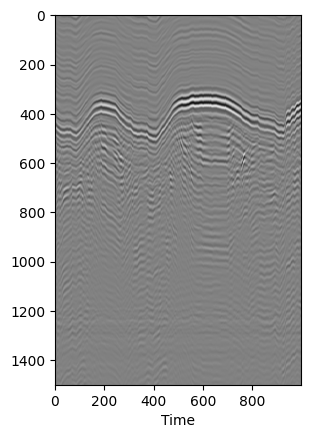

In [6]:
pr_roi = preiswerk_data[:1000, 2000:3500].T

plt.imshow(pr_roi, cmap="gray")
plt.xlabel("Time")
plt.show()

In [22]:
len(my_data[0])

3133

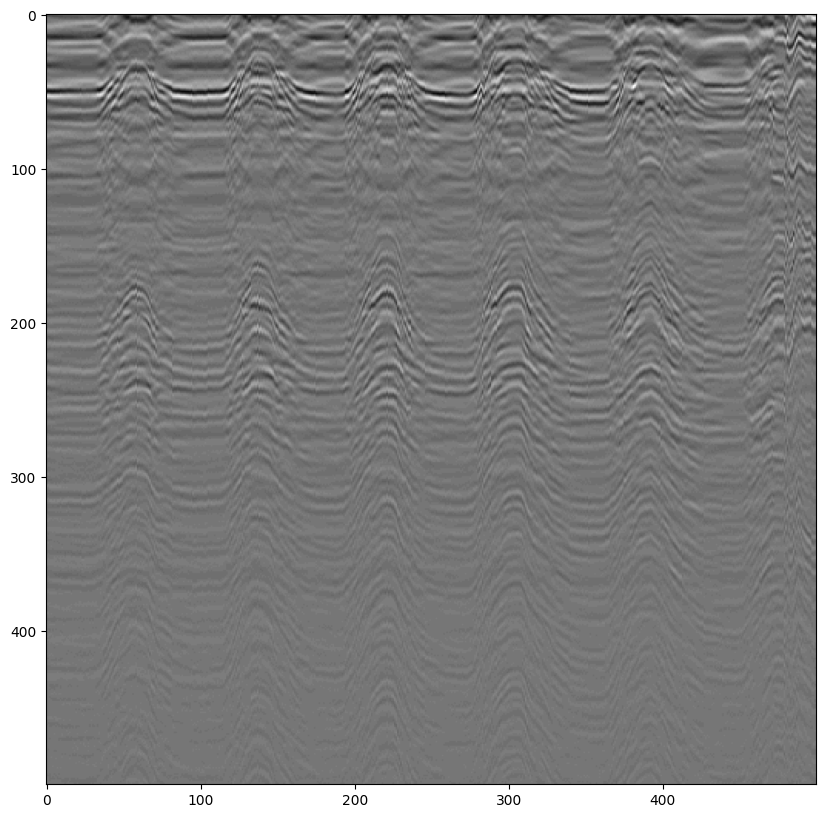

In [14]:
mynpdata = np.array(my_data4[0]).T
 
min = np.min(mynpdata)
max = np.max(mynpdata)

mynpdata  = (mynpdata - min) / (max - min)

plt.figure(figsize=(10, 10))
plt.imshow(mynpdata[:500, 1000:1500], cmap="gray")
plt.show()

In [17]:
mynpdata

array([[0.48979592, 0.52040816, 0.58163265, ..., 0.5       , 0.5       ,
        0.5       ],
       [0.5       , 0.54081633, 0.58163265, ..., 0.5       , 0.5       ,
        0.5       ],
       [0.55102041, 0.6122449 , 0.59183673, ..., 0.5       , 0.5       ,
        0.5       ],
       ...,
       [0.53061224, 0.48979592, 0.47959184, ..., 0.5       , 0.5       ,
        0.5       ],
       [0.53061224, 0.57142857, 0.57142857, ..., 0.5       , 0.5       ,
        0.5       ],
       [0.45918367, 0.48979592, 0.54081633, ..., 0.5       , 0.5       ,
        0.5       ]])

In [18]:
np.std(mynpdata)

0.014413432625246064